Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.contingency_tables import mcnemar

Read the dataset and see what is inside

In [15]:
dataset = pd.read_csv('./Datasets/final_dataset.csv')
dataset.head()
# dataset.keys()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


Correlation Matrix of the dataset

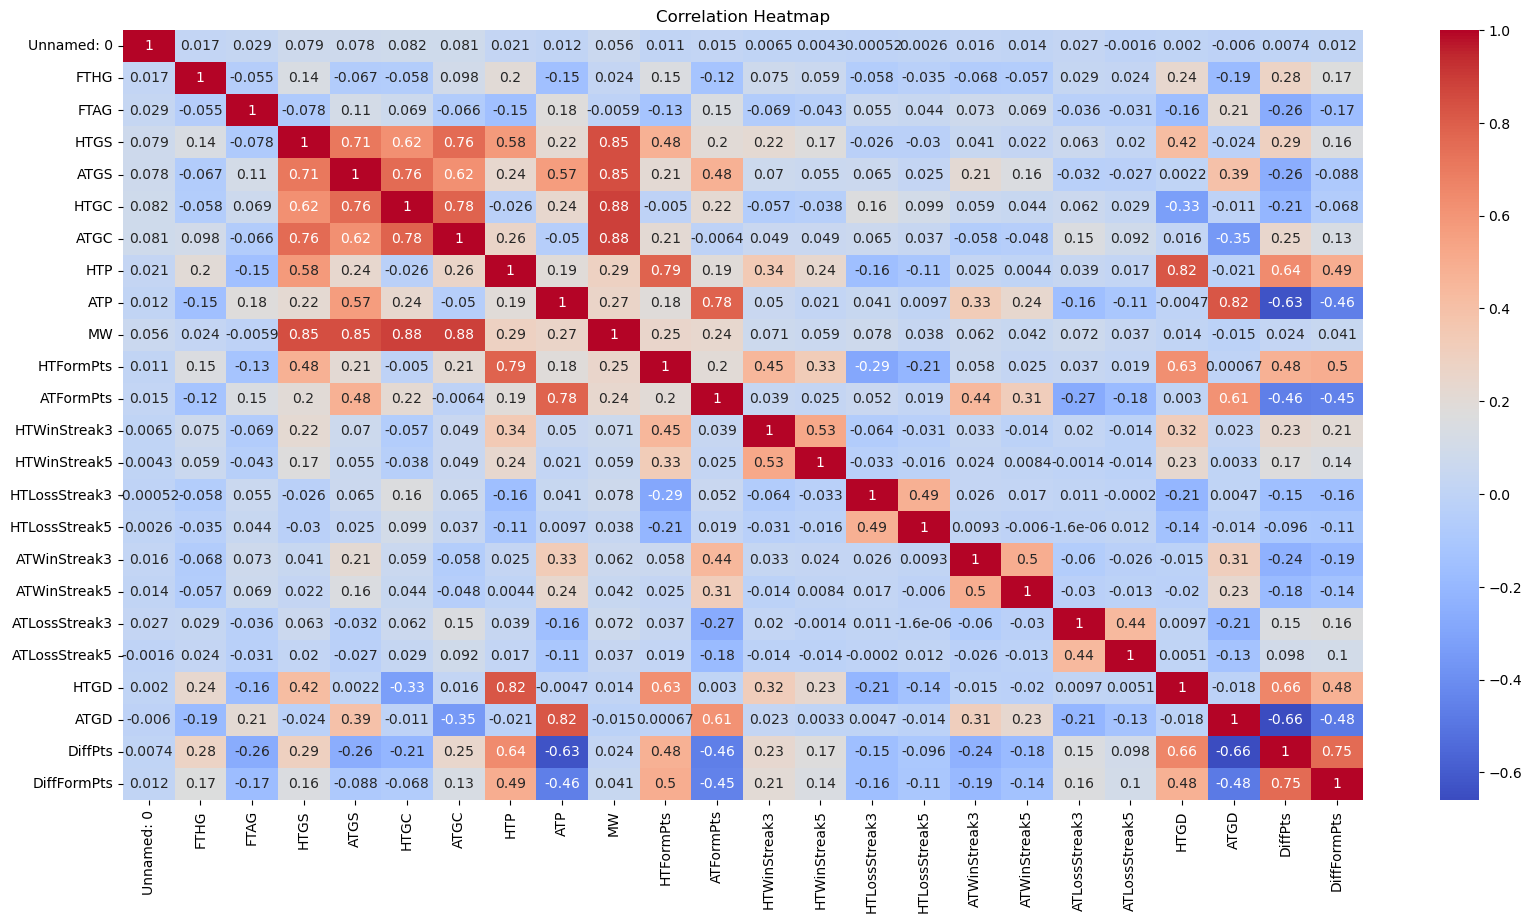

In [3]:
#Get numeric data: float and integer
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Remove Elements showing negative correlation

In [4]:
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )
dataset2.keys()
dataset2.head()

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


What is the win rate for the home team?

In [5]:
# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3176
Win rate of home team: 46.43%


Data Visualization

array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

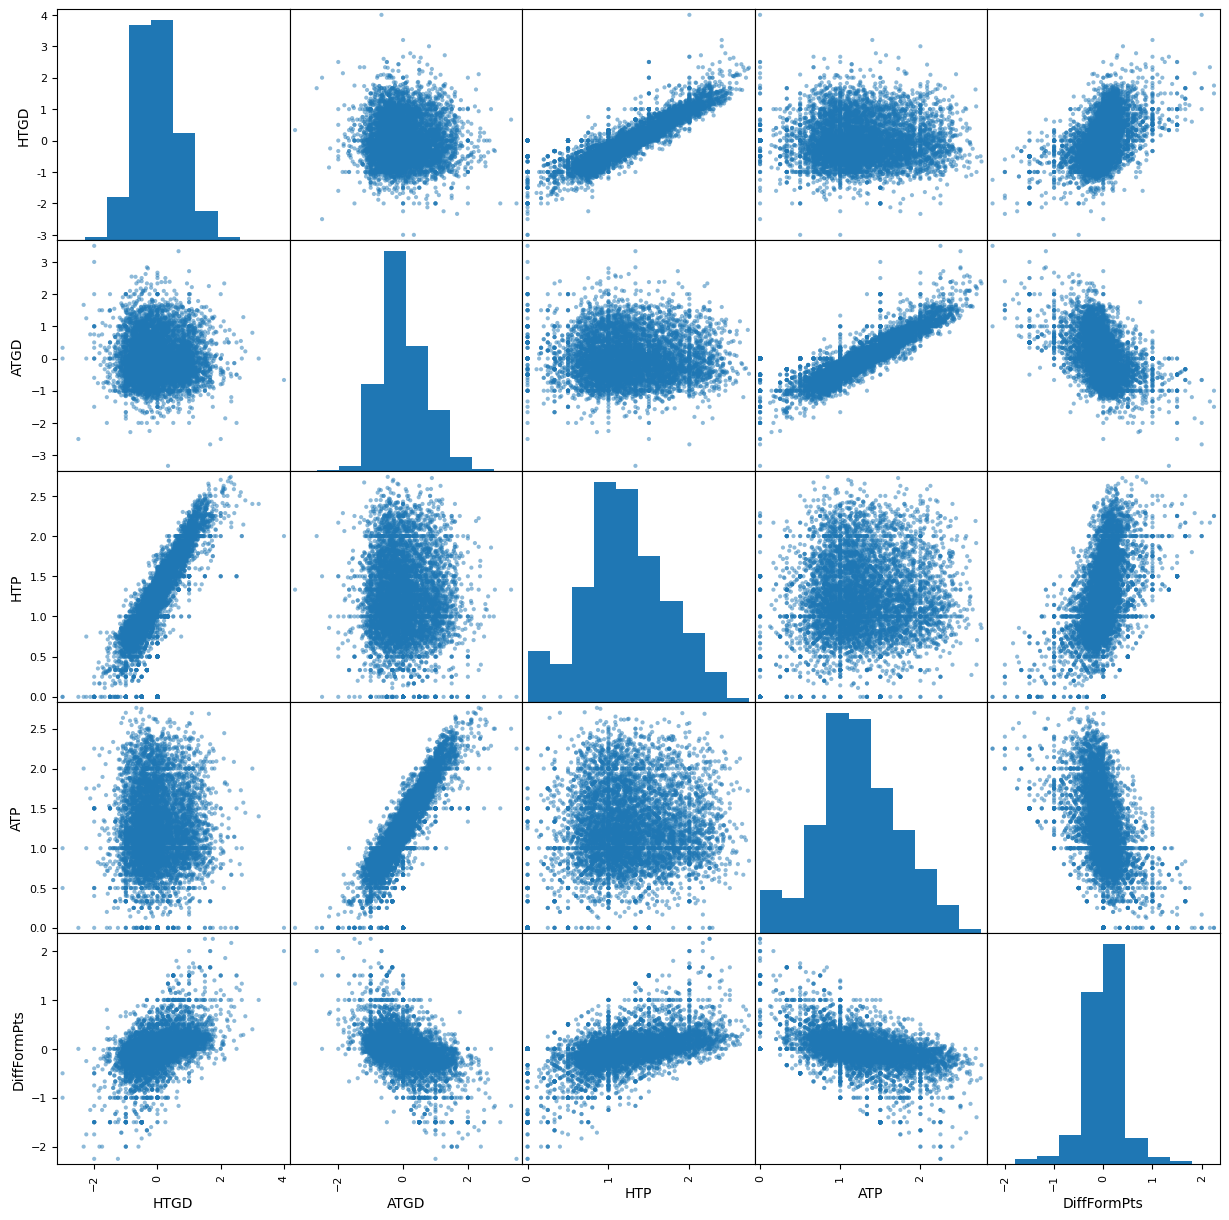

In [6]:
# Visualising distribution of data
#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [7]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'], axis=1)
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [8]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index=X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():  # Use X.items() instead of X.iteritems()

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))


Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [9]:
X_all.head(10)

,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,0,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
1,1,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
2,2,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
3,3,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
4,4,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
5,5,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
6,6,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
7,7,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
8,8,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
9,9,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0


Splitting the dataset

In [10]:
# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

Applying Logistic Regression Classifier

Training time: 0.1286 seconds
Prediction time: 0.0025 seconds
              precision    recall  f1-score   support

           H       0.64      0.54      0.59       953
          NH       0.65      0.73      0.69      1099

    accuracy                           0.64      2052
   macro avg       0.64      0.64      0.64      2052
weighted avg       0.64      0.64      0.64      2052



c:\Users\97798\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


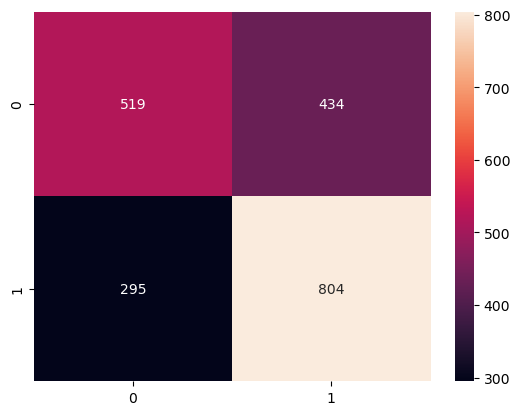

In [11]:
# Fitting Logistic Regression to the Training set
start_time = time.time()
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

start_time = time.time()
Y_pred = classifier.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
print(classification_report(y_test, Y_pred))

Applying Support Vector Machine (SVM)

Training time: 1.0289 seconds
Prediction time: 0.8954 seconds
              precision    recall  f1-score   support

           H       0.00      0.00      0.00       953
          NH       0.54      1.00      0.70      1099

    accuracy                           0.54      2052
   macro avg       0.27      0.50      0.35      2052
weighted avg       0.29      0.54      0.37      2052



c:\Users\97798\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\97798\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\97798\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


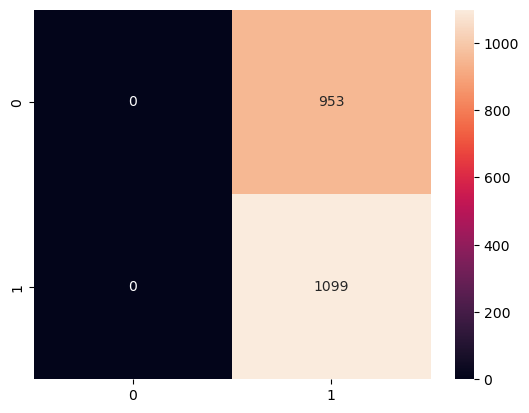

In [12]:
#Fitting the SVM to the training set
start_time = time.time()
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")
#predicting result
start_time = time.time()
Y_pred = classifier.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

# Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, Y_pred))

Applying the XGBoost

Training time: 1.8984 seconds
Prediction time: 0.0195 seconds
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       953
           1       0.63      0.67      0.65      1099

    accuracy                           0.61      2052
   macro avg       0.61      0.61      0.61      2052
weighted avg       0.61      0.61      0.61      2052



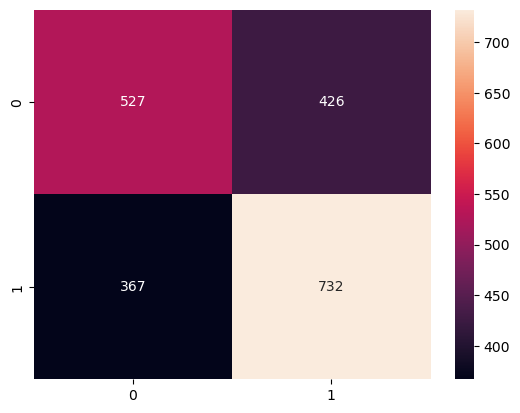

In [13]:
# Fitting XGBoost to the Training set
# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit and transform y_train
y_test_encoded = label_encoder.transform(y_test)  # Only transform y_test
start_time = time.time()
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train_encoded)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

# Predict the Test set results
start_time = time.time()
y_pred = classifier.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test_encoded, y_pred))

# To decode the predictions back to original labels (optional)
y_pred_labels = label_encoder.inverse_transform(y_pred)

Classifier's comparison using McNemar's test

In [14]:
# Confusion matrix summaries for pairwise comparison
# Fill these with the pairwise disagreements based on your datasets
# Each row/column refers to one classifier's disagreement counts with the other
# Logistic Regression vs. SVM
logistic_vs_svm = np.array([
    [519, 434],  # Logistic Regression correct, SVM incorrect
    [5, 1099]    # Logistic Regression incorrect, SVM correct
])

# Logistic Regression vs. XGBoost
logistic_vs_xgboost = np.array([
    [519, 426],  # Logistic Regression correct, XGBoost incorrect
    [295, 732]   # Logistic Regression incorrect, XGBoost correct
])

# SVM vs. XGBoost
svm_vs_xgboost = np.array([
    [0, 426],    # SVM correct, XGBoost incorrect
    [953, 732]   # SVM incorrect, XGBoost correct
])

# Perform McNemar's test for each pair
print("Logistic Regression vs. SVM:")
result = mcnemar(logistic_vs_svm, exact=True)
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")

print("\nLogistic Regression vs. XGBoost:")
result = mcnemar(logistic_vs_xgboost, exact=True)
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")

print("\nSVM vs. XGBoost:")
result = mcnemar(svm_vs_xgboost, exact=True)
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")

# Interpretation
alpha = 0.05
if result.pvalue < alpha:
    print("There is a significant difference between the classifiers.")
else:
    print("There is no significant difference between the classifiers.")

Logistic Regression vs. SVM:
Statistic: 5.0, p-value: 1.8927160861209427e-121

Logistic Regression vs. XGBoost:
Statistic: 295.0, p-value: 1.208983122728721e-06

SVM vs. XGBoost:
Statistic: 426.0, p-value: 1.1430813532358292e-46
There is a significant difference between the classifiers.
